In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [21]:
df=pd.read_csv('powerconsumption.csv')

In [22]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [23]:
df.drop(columns=['PowerConsumption_Zone2','PowerConsumption_Zone3'],inplace=True,axis=1)


In [24]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [26]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
dtype: int64

In [27]:
df['Date']=df['Datetime'].str.split(" ").str[0]
df['Time']=df['Datetime'].str.split(" ").str[1]

In [28]:
df['Day']=df['Date'].str.split("/").str[0]
df['Month']=df['Date'].str.split("/").str[1]
df['Year']=df['Date'].str.split("/").str[2]
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [29]:
df['Hour']=df['Time'].str.split(":").str[0]
df['Minute']=df['Time'].str.split(":").str[1]
df['Hour']=df['Hour'].astype(int)
df['Minute']=df['Minute'].astype(int)

In [30]:
df.drop(columns=['Date','Time'],inplace=True,axis=1)

In [31]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,Day,Month,Year,Hour,Minute
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,1,1,2017,0,0
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,1,1,2017,0,10
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,1,1,2017,0,20
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,1,1,2017,0,30
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,1,1,2017,0,40


In [45]:
X=df.drop(columns=['PowerConsumption_Zone1','Datetime'],axis=1)
y=df['PowerConsumption_Zone1']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [42]:
!pip install xgboost

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
models={
    "Linear_Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Decision_Tree":DecisionTreeRegressor(),
    "Random_Forest":RandomForestRegressor(),
    "KNearset":KNeighborsRegressor(),
    "Xgboost":XGBRegressor(),
    "Gradient_Boosting":GradientBoostingRegressor()
}

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Train Performance
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_r2 = r2_score(y_train, y_train_pred)

    # Test Performance
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)

    print(list(models.keys())[i])  #Print all model name

    print('Model Performance on Training Data')
    print('----------------------------------')
    print("-Mean Squared Error (MSE): {:.4f}".format(model_train_mse))
    print("-Mean Absolute Error (MAE): {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('Model Performance on Test Data')
    print('----------------------------------')
    print("-Mean Squared Error (MSE): {:.4f}".format(model_test_mse))
    print("-Mean Absolute Error (MAE): {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')


Linear_Regression
Model Performance on Training Data
----------------------------------
-Mean Squared Error (MSE): 18301657.5885
-Mean Absolute Error (MAE): 3402.3381
-R2 Score: 0.6393
Model Performance on Test Data
----------------------------------
-Mean Squared Error (MSE): 18304984.9444
-Mean Absolute Error (MAE): 3406.5201
-R2 Score: 0.6422


Lasso
Model Performance on Training Data
----------------------------------
-Mean Squared Error (MSE): 18301669.5226
-Mean Absolute Error (MAE): 3402.3309
-R2 Score: 0.6393
Model Performance on Test Data
----------------------------------
-Mean Squared Error (MSE): 18305356.3798
-Mean Absolute Error (MAE): 3406.5549
-R2 Score: 0.6422


Ridge
Model Performance on Training Data
----------------------------------
-Mean Squared Error (MSE): 18301657.6134
-Mean Absolute Error (MAE): 3402.3428
-R2 Score: 0.6393
Model Performance on Test Data
----------------------------------
-Mean Squared Error (MSE): 18304994.6919
-Mean Absolute Error (MAE): 3406

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xg_params={
    "learning_params":[0.1,0.01],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300],
    "colsample_bytree":[0.5,0.8,1,0.3,0.4]
}

rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

randomcv_models=[
    ("RF",RandomForestRegressor(),rf_params),
    ("XGB",XGBRegressor(),xg_params),
]

model_param={}

for name,model,params in randomcv_models:
    randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=10,cv=3,n_jobs=-1,verbose=2)
    randomcv.fit(X_train,y_train)
    model_param[name]=randomcv.best_params_


for model_name in model_param:
    print(model_name)
    print(model_param[model_name])
    print('\n')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
RF
{'n_estimators': 1000, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 15}


XGB
{'n_estimators': 200, 'max_depth': 12, 'learning_params': 0.1, 'colsample_bytree': 0.8}




In [49]:
models={
    "Random_Forest":RandomForestRegressor(n_estimators= 1000,min_samples_split= 8,max_features= 5,max_depth= 15),
    "XBGClassifier":XGBRegressor(n_estimators= 200,max_depth=12,learning_params=0.1,colsample_bytree=0.8)
}

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

   #Train Performance
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_r2 = r2_score(y_train, y_train_pred)

    # Test Performance
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)

    print(list(models.keys())[i])  #Print all model name

    print('Model Performance on Training Data')
    print('----------------------------------')
    print("-Mean Squared Error (MSE): {:.4f}".format(model_train_mse))
    print("-Mean Absolute Error (MAE): {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('Model Performance on Test Data')
    print('----------------------------------')
    print("-Mean Squared Error (MSE): {:.4f}".format(model_test_mse))
    print("-Mean Absolute Error (MAE): {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Random_Forest
Model Performance on Training Data
----------------------------------
-Mean Squared Error (MSE): 727393.2736
-Mean Absolute Error (MAE): 621.5892
-R2 Score: 0.9857
Model Performance on Test Data
----------------------------------
-Mean Squared Error (MSE): 1394858.7895
-Mean Absolute Error (MAE): 842.6415
-R2 Score: 0.9727


XBGClassifier
Model Performance on Training Data
----------------------------------
-Mean Squared Error (MSE): 361.5637
-Mean Absolute Error (MAE): 12.6991
-R2 Score: 1.0000
Model Performance on Test Data
----------------------------------
-Mean Squared Error (MSE): 671538.3691
-Mean Absolute Error (MAE): 544.4570
-R2 Score: 0.9869




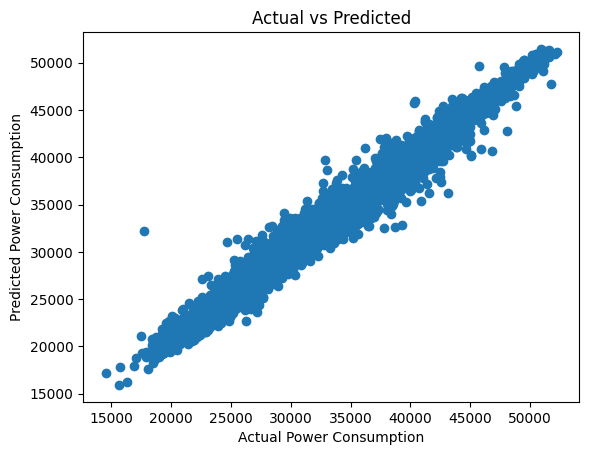

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title("Actual vs Predicted")
plt.show()


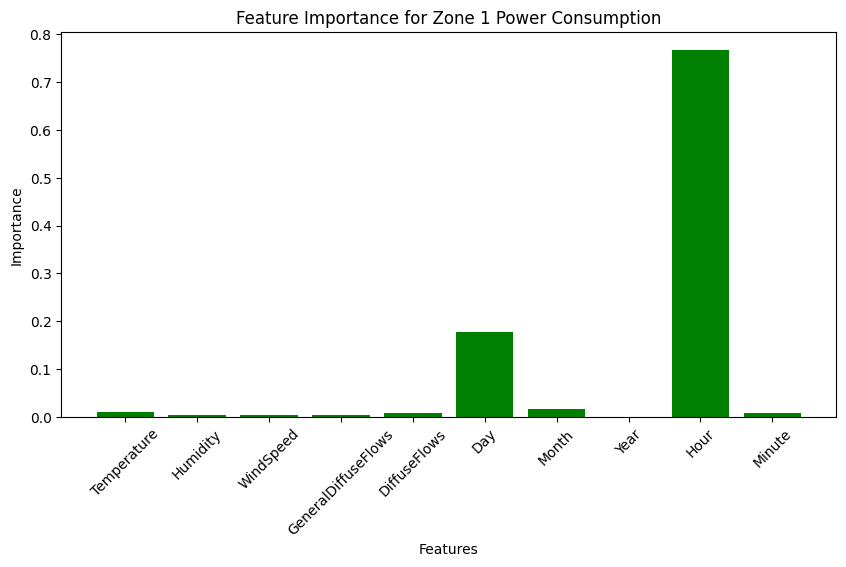

In [ ]:
importances = model.feature_importances_
plt.figure(figsize=(10,5))
plt.bar(X.columns, importances, color='green')
plt.title('Feature Importance for Zone 1 Power Consumption')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


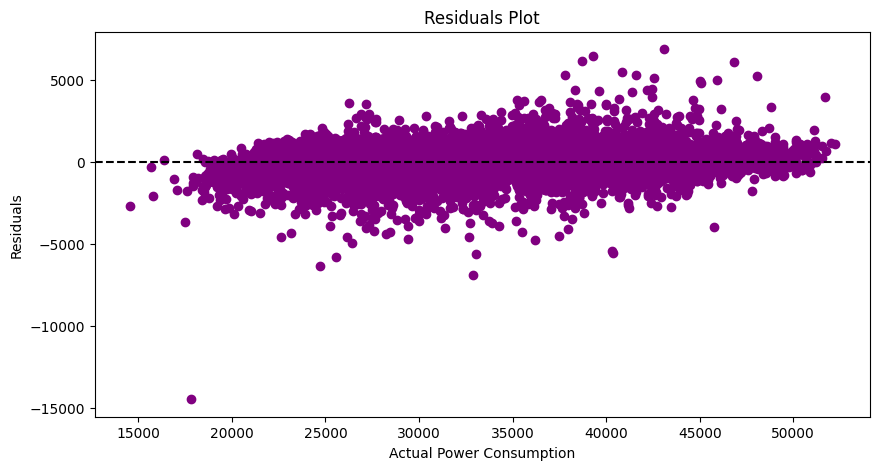

In [50]:
residuals = y_test.values - y_test_pred
plt.figure(figsize=(10,5))
plt.scatter(y_test, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Residuals')
plt.show()


In [51]:
import joblib

# Save the model
joblib.dump(models['XBGClassifier'], 'power_model.joblib')


['power_model.joblib']